X.shape :  (26, 2)


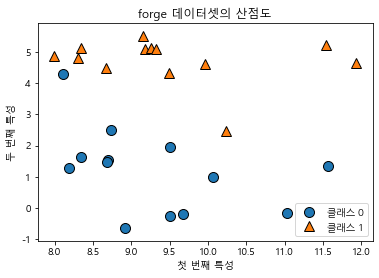

In [3]:
# 지도 학습 알고리즘

from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
# 이 책에서의 기본 설정

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus'] = False

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

# 2진 분류 데이터 셋인 forge 데이터셋을 인위적으로 만듦
X, y = mglearn.datasets.make_forge()
# 산점도를 그림
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.rcParams['font.family'] = 'NanumGothic'  # 한글 깨짐을 방지하기 위한 글씨체를 맑은 나눔으로 설정
plt.legend(["클래스 0", "클래스 1"])
plt.title("forge 데이터셋의 산점도")
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape : ", X.shape)  # 이 데이터셋은 데이터 포인트 26개와 특성 2개를 가짐

# 오류 메시지는 일단 무시하고 진행함.

Text(0, 0.5, '타깃')

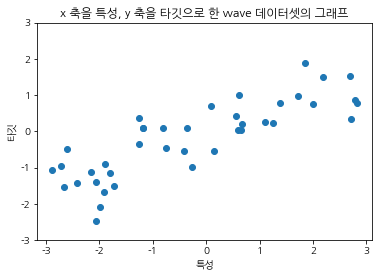

In [4]:
# 회귀 알고리즘 설명에는 인위적으로 만든 wave 데이터셋을 사용함.
# wave 데이터셋은 입력 특성 하나와 모델링할 타깃 변수를 가짐.
# 특성을 x축에 회귀의 타킷을 y축에 둠

X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.title("x 축을 특성, y 축을 타깃으로 한 wave 데이터셋의 그래프")
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [5]:
# scikit-learn의 실제 데이터 셋 두개를 불러옴.
# 하나는 유방암 종양의 임상 데이터를 기록해놓은 데이터 셋.
# 각 종양은 양성(해롭지 않음)과 악성(암)으로 레이블 되어 있고, 조직 데이터를 기반으로 종양이 악성인지를 예측할 수 있도록 학습하는 것이 과제임.
# 데이터는 scikit_learn의 load_breast_cancer함수로 불러올수 있음.

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys() : \n", cancer.keys())

# scikit_learn에 포함된 데이터는 실제 데이터와 데이터셋 정보를 담고 잇는 bunch객체에 저장되어 있음.
# Bunch 객체는 파이썬 딕셔너리와 비슷하지만 점 표기법 사용 가능

cancer.keys() : 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
# 이 데이터셋은 569개의 데이터 포인트를 가지며 특성은 30개임.
print("유방암 데이터의 형태 : ", cancer.data.shape)

유방암 데이터의 형태 :  (569, 30)


In [7]:
# 569개의 데이터 포인트 중 212개는 악성이고 357개는 양성임.
print("클래스별 샘플 개수 : \n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수 : 
 {'malignant': 212, 'benign': 357}


In [8]:
# feature_names 속성을 확인하면 각 특성의 의미 파악 가능

print("특성 이름 : \n", cancer.feature_names)

특성 이름 : 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
# 회귀 분석용 실제 데이터셋은 보스턴 주택가격 데이터셋을 사용.
# 이 데이터셋으로 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보로 1970년대 보스턴 주변의 주택 평균 가격을 예측할 것.
# 이 데이터 셋은 데이터 포인트 506개와 특성 13개가 있음.

from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태 : ", boston.data.shape)

# 이 데이터셋에서는 13개의 입력 특성 분 아니라 특성끼리 곱하여(상호작용) 의도적으로 확장함.
# 즉, 범죄율과 고속도로 접근성의 개별 특성, 그리고 범죄율과 고속도로 접근성의 곱도 특성으로 생각함.
# 이처럼 특성을 유도해내는 것을 __특성 공학__ 이라함.
# 유도된 데이터셋은 load_extended_boston 함수를 사용하여 불러들일 수 있다.

데이터의 형태 :  (506, 13)


In [11]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape : ", X.shape)

X.shape :  (506, 104)


In [13]:
# 원래의 13개에서 2개씩 짝찌은 91개의 특성을 더해 총 104개가 됨.

In [14]:
# k-최근접 이웃(k-NN) : nearest Neighbors
# 가장 간단한 알고리즘으로 데이터 셋을 저장하는 것이 모델 만드는 과정의 전부이다.
# 새 데이터 포인트를 예측할 댄 알고리즘이 훈련 데이터에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾는다.


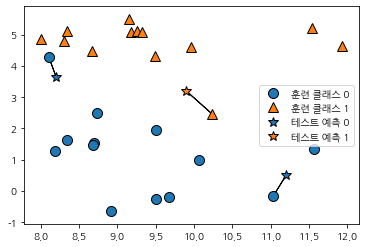

In [16]:
# k-최근접 이웃 분류
mglearn.plots.plot_knn_classification(n_neighbors = 1)

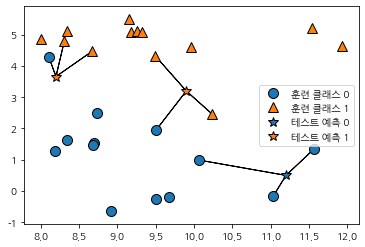

In [17]:
# 데이터 포인트 3개 추가, 각 데이터 포인트에서 가장 가까운 훈련 데이터 포인트를 연결함.
# 이웃을 임의의 k개 선택 가능.
# 둘 이상의 이웃을 선택시에는 투표를 한다.

mglearn.plots.plot_knn_classification(n_neighbors=3)

In [19]:
# scikit-learn으로 k-최근접 이웃 알고리즘의 적용 예를 보자.

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)  # 매개변수로 이웃의 수 지정(3으로)

In [22]:
clf.fit(X_train, y_train)  # 분류 모델 학습(KNeighborsClassifier의 학습은 예측 시 이웃을 찾을 수 있게 데이터 저장하는 것)

KNeighborsClassifier(n_neighbors=3)

In [24]:
print("테스트 세트 예측 : ", clf.predict(X_test))  #predict 함수 : 데이터 예측t 함수 : 데이터 예측

테스트 세트 예측 :  [1 0 1 0 1 0 0]


In [25]:
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test, y_test))) # 모델의 일반화를 평가하기 위해 score 메서드의 테스트 데이터와
# 레이블을 넣어 호출한다

테스트 세트 정확도 : 0.86


In [26]:
# 이 모델의 정확도는 86%로 나온다.

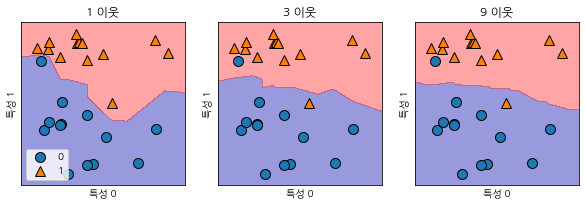

In [29]:
# KNeighborsClassifier 분석

flg, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes) :
    # fit 메소드는 self 오브젝트를 리턴해서 객체 생성과 fit 메소드를 한줄 에 쓸수 있다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    axes[0].legend(loc=3)

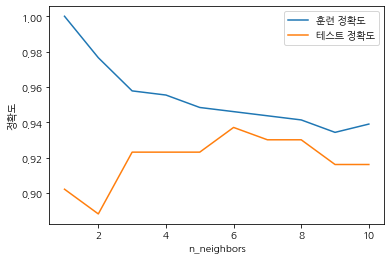

In [31]:
# 이웃의 수가 많아질 수록 경게는 부드러워진다(모델이 단순해짐)
# 즉, 이웃을 적게 사용하면 모델의 복잡도가 높아지고, 많이 사용하면 복잡도는 낮아진다.

# 모델의 복잡도와 일반화 사이의 관계 입증을 알아보자.(유방암 데이터셋 사용)
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
# 먼저 훈련 세트와 테스트 세트로 나눔
# 그후 이웃의 수를 달리 하여 훈련 세트와 테스트 세트의 성능을 평가한디. 
training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings :
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()